In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r'D:\dataset\spotify_data\data.csv')
df=dataset
print(df.head())

   acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8  

In [2]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [3]:
df.shape

(169909, 19)

In [4]:
df.columns

Index([u'acousticness', u'artists', u'danceability', u'duration_ms', u'energy',
       u'explicit', u'id', u'instrumentalness', u'key', u'liveness',
       u'loudness', u'mode', u'name', u'popularity', u'release_date',
       u'speechiness', u'tempo', u'valence', u'year'],
      dtype='object')

In [5]:
pd.isnull(df).sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [6]:
df["artists"].value_counts()[:20]

['Эрнест Хемингуэй']              1215
['Francisco Canaro']               938
['Эрих Мария Ремарк']              781
['Ignacio Corsini']                620
['Frank Sinatra']                  592
['Bob Dylan']                      539
['The Rolling Stones']             512
['Johnny Cash']                    502
['The Beach Boys']                 491
['Elvis Presley']                  488
['Francisco Canaro', 'Charlo']     459
['Queen']                          426
['Dean Martin']                    411
['The Beatles']                    410
['Miles Davis']                    408
['Billie Holiday']                 400
['Fleetwood Mac']                  398
['Ella Fitzgerald']                354
['Lead Belly']                     339
['Led Zeppelin']                   338
Name: artists, dtype: int64

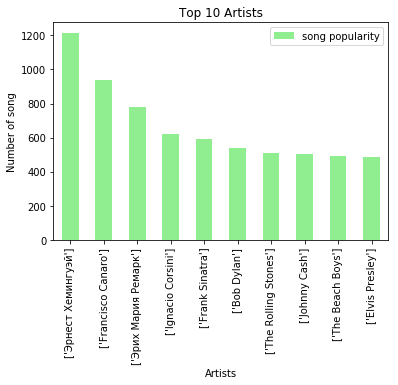

In [7]:
a=pd.DataFrame({'song popularity':df['artists'].value_counts().head(10)})
a.plot.bar(color='lightgreen')
plt.title('Top 10 Artists')
plt.xlabel('Artists')
plt.ylabel('Number of song')
plt.show()

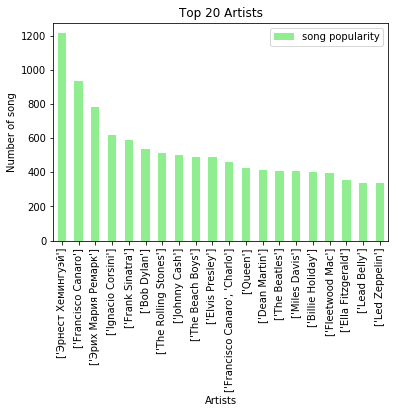

In [8]:
a=pd.DataFrame({'song popularity':df['artists'].value_counts().head(20)})
a.plot.bar(color='lightgreen')
plt.title('Top 20 Artists')
plt.xlabel('Artists')
plt.ylabel('Number of song')
plt.show()

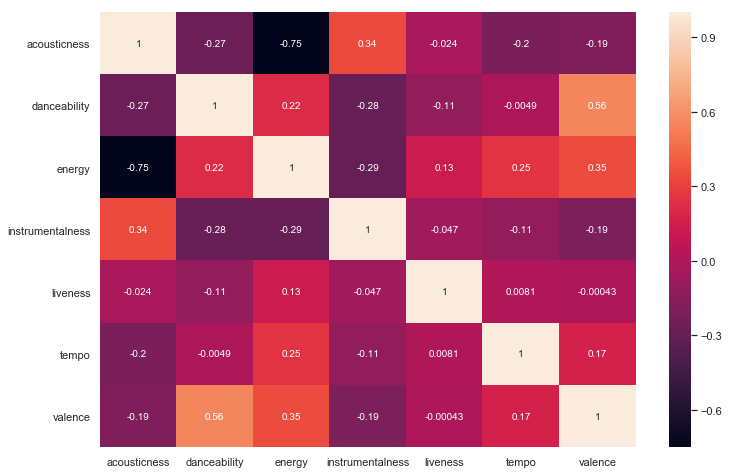

In [9]:
corr = df[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [10]:
df[['artists','energy','acousticness']].groupby('artists').mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness
artists,,
['Ocean Sounds ACE'],1.000000,0.629000
['Darkthrone'],0.999500,0.008002
['Nature Sounds Nature Music'],0.999333,0.640000
['The Relaxing Sounds of Swedish Nature'],0.999000,0.508000
['Tranquility Spree'],0.999000,0.112000
['Lluvia PQ'],0.999000,0.123000
['Thunderbound Productions'],0.999000,0.954000
['Swell Maps'],0.999000,0.000298
['Caramella Girls'],0.998500,0.028700


In [11]:
df.acousticness.mean()

0.4932139761498824

In [12]:
year_avg = df[['danceability','energy','liveness','acousticness', 'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()

year_avg.head()

,year,danceability,energy,liveness,acousticness,valence
0,1921,0.425661,0.236784,0.215814,0.895823,0.425495
1,1922,0.480000,0.237026,0.238647,0.939236,0.534056
2,1923,0.568462,0.246936,0.236656,0.976329,0.624788
3,1924,0.548654,0.347033,0.237875,0.935575,0.668574
4,1925,0.571890,0.264373,0.243094,0.965422,0.616430


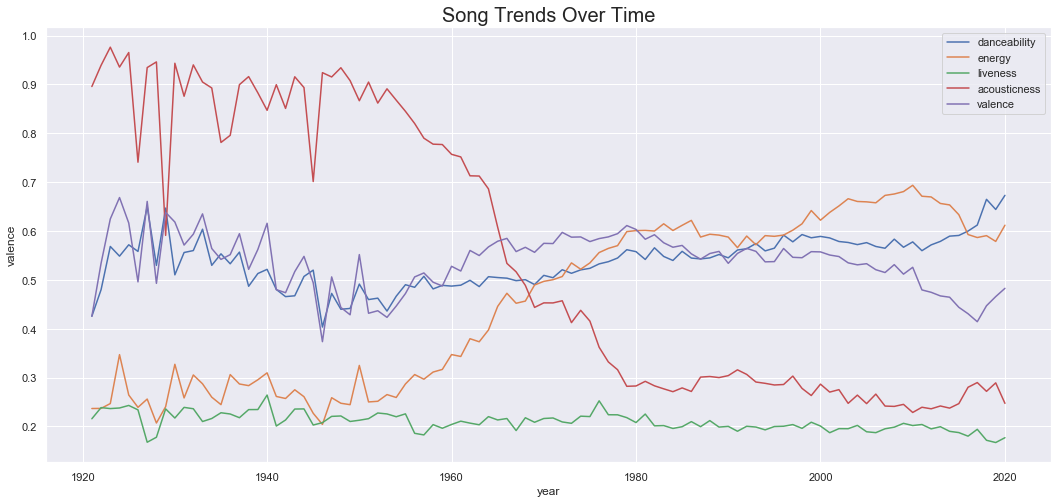

In [13]:
plt.figure(figsize=(18,8))
plt.title("Song Trends Over Time", fontsize=20)
lines = ['danceability','energy','liveness','acousticness','valence']
for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
plt.legend(lines)

In [14]:
melted = year_avg.melt(id_vars='year')
melted.head()

,year,variable,value
0,1921,danceability,0.425661
1,1922,danceability,0.480000
2,1923,danceability,0.568462
3,1924,danceability,0.548654
4,1925,danceability,0.571890


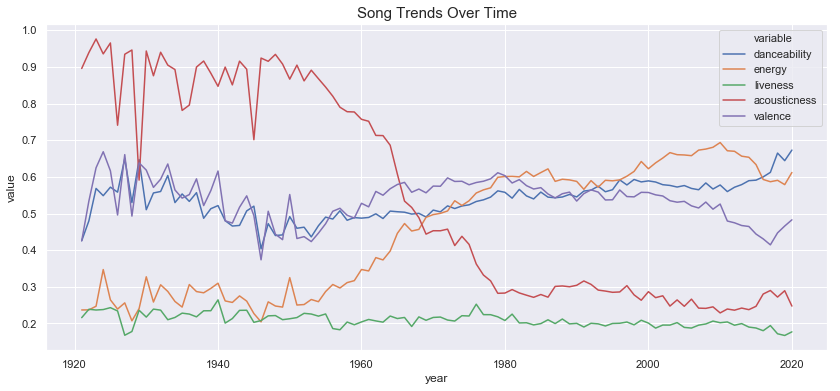

In [15]:
plt.figure(figsize=(14,6))
plt.title("Song Trends Over Time", fontsize=15)
sns.lineplot(x='year', y='value', hue='variable', data=melted)